In [3]:
import numpy as np
filename = 'presidential_polls.csv'
# with open(filename,'r') as data_file:
#     col_names_str = data_file.readline()[:-1]
# col_name_list = col_names_str.split(',')

# print(col_name_list)
# print(len(col_name_list))
# col_index = np.arange(len(col_name_list))
# print(col_index)

# use_col_name_list = ['enddate','rawpoll_clinton','rawpoll_trump',
#                      'adjpoll_clinton','adjpoll_trump']
# use_col_index_list = [col_name_list.index(use_col_name) for use_col_name in use_col_name_list]

# data_array = np.genfromtxt(filename,
#                         dtype=str,
#                         delimiter=',',
#                         usecols=use_col_index_list
#                       )
import pandas as pd
data = pd.read_csv(filename)
data.head()
# import matplotlib.pyplot as plt
# x = data_array['enddate']
    
# data_array.size

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,...,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,...,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


In [5]:
type(data)
data.shape[0]

10236

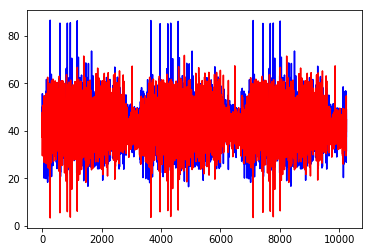

In [8]:
import matplotlib.pyplot as plt
x = data['enddate']
plt.plot(data.index,data['adjpoll_clinton'],color="blue")
plt.plot(data.index,data['adjpoll_trump'],color="red")
plt.show()

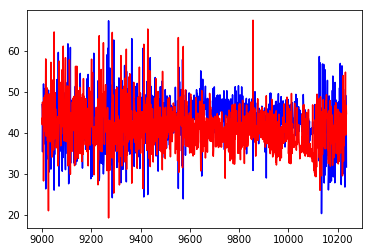

In [10]:
plt.plot(data.index[9000:],data['adjpoll_clinton'][9000:],color="blue")
plt.plot(data.index[9000:],data['adjpoll_trump'][9000:],color="red")
plt.show()

In [11]:
variables_missing_value = data.isnull().sum()
variables_missing_value

cycle                   0
branch                  0
type                    0
matchup                 0
forecastdate            0
state                   0
startdate               0
enddate                 0
pollster                0
grade                1134
samplesize              3
population              0
poll_wt                 0
rawpoll_clinton         0
rawpoll_trump           0
rawpoll_johnson      3756
rawpoll_mcmullin    10185
adjpoll_clinton         0
adjpoll_trump           0
adjpoll_johnson      3756
adjpoll_mcmullin    10185
multiversions       10203
url                     0
poll_id                 0
question_id             0
createddate             0
timestamp               0
dtype: int64

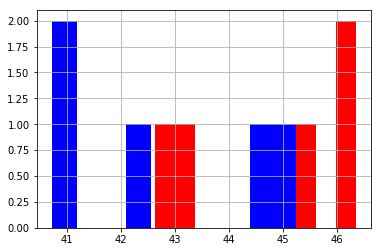

In [19]:
data['adjpoll_trump'].head().hist(color="blue")
data['adjpoll_clinton'].head().hist(color="red")

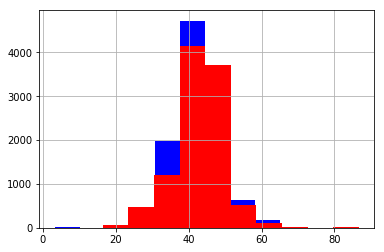

In [18]:
data['adjpoll_trump'].hist(color="blue")
data['adjpoll_clinton'].hist(color="red")

In [27]:
with open(filename,"r") as f:
    col_names_str = f.readline()[:-1]
col_name_list = col_names_str.split(",")
use_col_name_list = ['state','enddate','rawpoll_clinton','rawpoll_trump','adjpoll_clinton','adjpoll_trump']
use_col_index_list=[col_name_list.index(use_col_name) for use_col_name in use_col_name_list]
data_array = np.loadtxt(filename,
                       delimiter=',',
                       skiprows=1,
                       dtype=str,
                       usecols=use_col_index_list)
data_array

array([['"U.S."', '10/31/2016', '37.69', '35.07', '42.6414', '40.86509'],
       ['"U.S."', '10/30/2016', '45', '46', '43.29659', '44.72984'],
       ['"Virginia"', '10/30/2016', '48', '42', '46.29779', '40.72604'],
       ...,
       ['"Virginia"', '9/22/2016', '46.54', '40.04', '45.9713',
        '39.97518'],
       ['"North Carolina"', '6/21/2016', '43', '43', '45.2939',
        '46.66175'],
       ['"Utah"', '8/18/2016', '32.54', '43.61', '31.62721', '44.65947']],
      dtype='<U22')

In [41]:
import datetime
enddate_idx = use_col_name_list.index('enddate')
enddate_list = data_array[:,enddate_idx].tolist()
enddate_list = [enddate.replace('-','/') for enddate in enddate_list]
# date_list = [datetime.datetime.strptime(enddate, "%m/%d/%Y") for enddate in enddate_list]
date_list = [datetime.datetime.strptime(enddate, "%m/%d/%Y") for enddate in enddate_list]
month_list = ['%d-%02d' %(date_obj.year,date_obj.month) for date_obj in date_list]
month_list

['2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '2016-10',
 '20

In [40]:
month_array = np.array(month_list)
month_array

array(['2016-10', '2016-10', '2016-10', ..., '2016-09', '2016-06',
       '2016-08'], dtype='<U7')

In [42]:
months = np.unique(month_array)
months

array(['2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10'],
      dtype='<U7')

In [45]:
state_idx = use_col_name_list.index('state')
state_array = data_array[:,state_idx]
states = list(np.unique(state_array))
states

['"Alabama"',
 '"Alaska"',
 '"Arizona"',
 '"Arkansas"',
 '"California"',
 '"Colorado"',
 '"Connecticut"',
 '"Delaware"',
 '"District of Columbia"',
 '"Florida"',
 '"Georgia"',
 '"Hawaii"',
 '"Idaho"',
 '"Illinois"',
 '"Indiana"',
 '"Iowa"',
 '"Kansas"',
 '"Kentucky"',
 '"Louisiana"',
 '"Maine CD-1"',
 '"Maine CD-2"',
 '"Maine"',
 '"Maryland"',
 '"Massachusetts"',
 '"Michigan"',
 '"Minnesota"',
 '"Mississippi"',
 '"Missouri"',
 '"Montana"',
 '"Nebraska CD-1"',
 '"Nebraska CD-2"',
 '"Nebraska CD-3"',
 '"Nebraska"',
 '"Nevada"',
 '"New Hampshire"',
 '"New Jersey"',
 '"New Mexico"',
 '"New York"',
 '"North Carolina"',
 '"North Dakota"',
 '"Ohio"',
 '"Oklahoma"',
 '"Oregon"',
 '"Pennsylvania"',
 '"Rhode Island"',
 '"South Carolina"',
 '"South Dakota"',
 '"Tennessee"',
 '"Texas"',
 '"U.S."',
 '"Utah"',
 '"Vermont"',
 '"Virginia"',
 '"Washington"',
 '"West Virginia"',
 '"Wisconsin"',
 '"Wyoming"']

In [62]:
rawpoll_clinton_idx = use_col_name_list.index('rawpoll_clinton')
rawpoll_clinton_data = data_array[:,rawpoll_clinton_idx]

adjpoll_clinton_idx = use_col_name_list.index('adjpoll_clinton')
adjpoll_clinton_data = data_array[:,adjpoll_clinton_idx]

rawpoll_trump_idx = use_col_name_list.index('rawpoll_trump')
rawpoll_trump_data = data_array[:,rawpoll_trump_idx]

adjpoll_trump_idx = use_col_name_list.index('adjpoll_trump')
adjpoll_trump_data = data_array[:,adjpoll_trump_idx]

results = []

def is_convert_float(s):
    try:
        float(s)
    except:
        return False
    return True

def get_sum(str_array):
    cleaned_data = filter(is_convert_float,str_array)
    float_array = np.array(list(cleaned_data),np.float)
    return np.sum(float_array)

for month in months:
    rawpoll_clinton_month_data = rawpoll_clinton_data[month_array == month]
    rawpoll_clinton_month_sum = get_sum(rawpoll_clinton_month_data)
    adjpoll_clinton_month_data = adjpoll_clinton_data[month_array == month]
    adjpoll_clinton_month_sum = get_sum(adjpoll_clinton_month_data)
    
    rawpoll_trump_month_data = rawpoll_trump_data[month_array == month]
    rawpoll_trump_month_sum = get_sum(rawpoll_trump_month_data)
    adjpoll_trump_month_data = adjpoll_trump_data[month_array == month]
    adjpoll_trump_month_sum = get_sum(adjpoll_trump_month_data)
    
    results.append((month,rawpoll_clinton_month_sum,adjpoll_clinton_month_sum,rawpoll_trump_month_sum,adjpoll_trump_month_sum))

print(results)

months,raw_clinton_sum,adj_clinton_sum,raw_trump_sum,adj_trump_sum = zip(*results)
print(raw_clinton_sum)
print(raw_trump_sum)

[('2015-11', 1920.0, 1916.6980600000002, 1948.1999999999998, 1937.3290100000002), ('2015-12', 4816.8, 4637.25688, 4164.3, 4088.9218999999994), ('2016-01', 6861.60007685, 6585.16702, 6267.0, 6253.24935), ('2016-02', 8271.6002536, 7946.228610000001, 7528.200000000001, 7672.3398), ('2016-03', 11656.202546, 11156.098240000001, 9626.7, 9991.59358), ('2016-04', 11911.8039268, 11579.42678, 9396.3, 9884.156190000002), ('2016-05', 12155.7247957, 12242.27538, 11456.1061505, 12069.761290000002), ('2016-06', 20721.0537163, 19771.33576, 16551.9, 18154.90623), ('2016-07', 22007.0138546, 23233.111679999998, 21426.989999999998, 22757.07327), ('2016-08', 63619.396242, 67909.28210000001, 59529.0, 66428.29714000001), ('2016-09', 96476.6678689, 102445.45295, 98418.9955574, 106065.00385000001), ('2016-10', 162766.8889154, 165319.59355, 155392.975543, 164990.78638900002)]
(1920.0, 4816.8, 6861.60007685, 8271.6002536, 11656.202546, 11911.8039268, 12155.7247957, 20721.0537163, 22007.0138546, 63619.396242, 964

(1920.0, 4816.8, 6861.60007685, 8271.6002536, 11656.202546, 11911.8039268, 12155.7247957, 20721.0537163, 22007.0138546, 63619.396242, 96476.6678689, 162766.8889154)
(1948.1999999999998, 4164.3, 6267.0, 7528.200000000001, 9626.7, 9396.3, 11456.1061505, 16551.9, 21426.989999999998, 59529.0, 98418.9955574, 155392.975543)
[ 0  1  2  3  4  5  6  7  8  9 10 11]


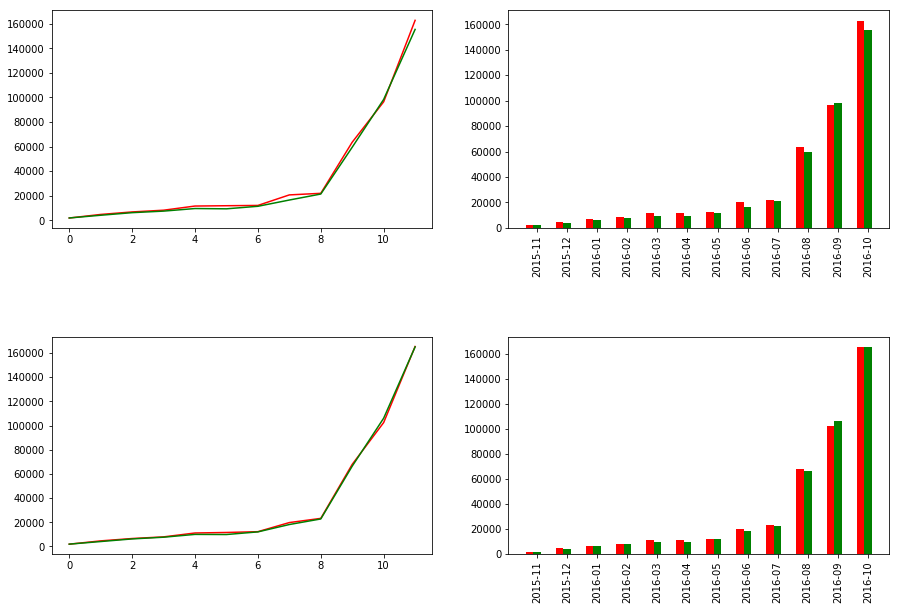

In [82]:
fig,subplot_arr = plt.subplots(2,2,figsize=(15,10))

print(raw_clinton_sum)
print(raw_trump_sum)

subplot_arr[0,0].plot(raw_clinton_sum,color='red')
subplot_arr[0,0].plot(raw_trump_sum,color='green')

width = 0.25
x = np.arange(len(months))
print(x)
subplot_arr[0,1].bar(x,raw_clinton_sum,width,color='red')
subplot_arr[0,1].bar(x+width,raw_trump_sum,width,color='green')
subplot_arr[0,1].set_xticks(x+width)
subplot_arr[0,1].set_xticklabels(months,rotation='vertical')

subplot_arr[1,0].plot(adj_clinton_sum,color='red')
subplot_arr[1,0].plot(adj_trump_sum,color='green')

width = 0.25
x = np.arange(len(months))
subplot_arr[1,1].bar(x,adj_clinton_sum,width,color='red')
subplot_arr[1,1].bar(x+width,adj_trump_sum,width,color='green')
subplot_arr[1,1].set_xticks(x+width)
subplot_arr[1,1].set_xticklabels(months,rotation='vertical')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()